In [1]:
using Plots
using LaTeXStrings

LoadError: ArgumentError: Package LaTeXStrings not found in current path.
- Run `import Pkg; Pkg.add("LaTeXStrings")` to install the LaTeXStrings package.

# Modelo de Hodgkin-Huxley
El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

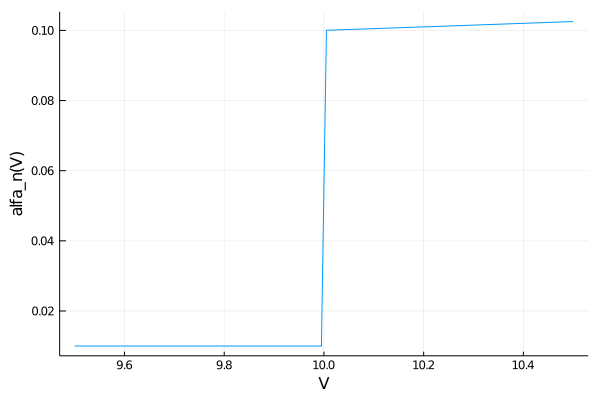

In [8]:
using Plots

## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado


function alfa_n(V)   
    epsilon = 1e-6    
                     
    if V - 10 < epsilon
        return 0.01
    else
        return 0.01 * (10 - V) / ((exp((10 - V) / 10)) - 1)
    end
end

V = range(9.5, stop=10.5, length=10)
result = alfa_n.(V)

plot(V, result, xlabel="V", ylabel="alfa_n(V)", legend=false)

#En primer lugar esta función verifica si la diferencia  entre V y 10 es menor que un valor de epsilon (en este caso se eligió,
#1e-6).Si se cumple esta condición, devuelve un valor constante de 0.01. De lo contrario, calcula el resultado utilizando la 
#fórmula dada.
#Luego, se creó un rango de valores V en el intervalo de 9.5 a 10.5 con una longitud de 10 puntos. A medidada que se aumente
# el número de puntos la gráfica se va a aproximar a un valor de 10. Luego, se aplica la función alfa_n a cada valor de V 
# utilizando la notación alfa_n.(V)

In [34]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n
using Plots


function beta_n(V)
   return 0.125 * exp(-V/80)
end


function plotAlpha()
    V = -150:150
    alpha = alpha_n(V)
    beta = beta_n(V)
    plot(
        V,
        alpha,
        title="Tazas de transición",
        xlabel=L"V\ con\ respecto\ a\ V_r (mV)",
        ylabel=L"traza (ms^{-1})",
        label=L"\alpha(V)"
        )
    plot!(V, beta, label=L"\beta(V)")
end


plotAlpha()


LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[34]:19

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

In [ ]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar

function alpha_m(V)
    # Completar
end


function beta_m(V)
    # Completar
end


function alpha_h(V)
    # Completar
end


function beta_h(V)
    # Completar
end


function tau_inf(alpha, beta)
    # Completar
end


function n_inf(alpha, beta)
    # Completar
end


function plotParameters()
    V = -100:100
    
    n_inf_n = n_inf(alpha_n(V), beta_n(V))
    tau_inf_n = tau_inf(alpha_n(V), beta_n(V))
    
    n_inf_m = n_inf(alpha_m(V), beta_m(V))
    tau_inf_m = tau_inf(alpha_m(V), beta_m(V))
    
    n_inf_h = n_inf(alpha_h(V), beta_h(V))
    tau_inf_h = tau_inf(alpha_h(V), beta_h(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=[L"n_{\infty}(V)" L"m_{\infty}(V)" L"h_{\infty}(V)"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, n_inf_m, tau_inf_h],
        label=[L"\tau_{n}(V)" L"\tau_{m}(V)" L"\tau_{h}(V)"]
    )
    
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transición" "Constantes temporales"],
        xlabel=[L"V\ realtivo\ a\ V_r\ (mV)" L"V\ realtivo\ a\ V_r\ (mV)"],
        ylabel=[L"adimensional" L"\tau\ (ms)"],
        legend=true
    )
end


plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [32]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

In [33]:
# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function EulerHodkinHuxley(parametros)
    """Devuelve la solucion a las ecuaciones diferenciales del modelo de Hodgkin
    y Huxley utilizando el metodo de Euler
    """
end
  

function plotSimulation(resultado)
    tiempo = resultado["T"]
    
    p1 = plot(tiempo, resultado["V"])
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel="t (ms)",
        ylabel=["Voltaje relativo en la membrana (mV)" L"Conductancia (mS/cm^2)" "adimensional" L"\tau (ms)"],
        legend=true
    )
end
    

function simulaHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    parametros["V0"] = V0
    resultado = EulerHodkinHuxley(parametros)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(V0, t0, tfin, current)

LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[33]:18

In [56]:
using Plots
begin

params = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # microF/cm2
    "ENa" => 115.0,     # Using the original Hodgkin-Huxley convention
    "EK" => -12.0,
    "THE" => 10_613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Returns the value of the current applied to the membrane, at time t, in microamps.
        """
        if (t > t0) & (t < tfin)
            return current  # micro A/cm2
        else
            return 0
        end
    end
    return Iext
end

function EulerHodkinHuxley(parameters)
    """Returns the solution to the differential equations of the Hodgkin model
    and Huxley using Euler's method.
    """
    deltaT = parameters["DeltaT"]
    maxT = parameters["maxT"]
    V0 = parameters["V0"]
    gNa = parameters["gNa"]
    gK = parameters["gK"]
    gL = parameters["gL"]
    Cm = parameters["Cm"]
    ENa = parameters["ENa"]
    EK = parameters["EK"]
    THE = parameters["THE"]
    Iext = makeIext()

    numSteps = Int(maxT / deltaT)
    T = zeros(numSteps)
    V = zeros(numSteps)
    n = zeros(numSteps)
    m = zeros(numSteps)
    h = zeros(numSteps)
    GK = zeros(numSteps)
    GNa = zeros(numSteps)
    tauN = zeros(numSteps)
    tauM = zeros(numSteps)
    tauH = zeros(numSteps)

    # Initialize variables
    T[1] = 0.0
    V[1] = V0
    n[1] = 0.3177
    m[1] = 0.0529
    h[1] = 0.5961

    for i in 2:numSteps
        t = T[i-1]
        V[i] = V[i-1] - (deltaT / Cm) * (
                gNa * m[i-1]^3 * h[i-1] * (V[i-1] - ENa) +
                gK * n[i-1]^4 * (V[i-1] - EK) +
                gL * (V[i-1] - THE) +
                Iext(t)
            )

        n[i] = n[i-1] + deltaT * (
                (1 - deltaT / tauN[i-1]) * n[i-1] +
                deltaT / tauN[i-1] * nInf(V[i-1])
            )

        m[i] = m[i-1] + deltaT * (
                (1 - deltaT / tauM[i-1]) * m[i-1] +
                deltaT / tauM[i-1] * mInf(V[i-1])
            )

        h[i] = h[i-1] + deltaT * (
                (1 - deltaT / tauH[i-1]) * h[i-1] +
                deltaT / tauH[i-1] * hInf(V[i-1])
            )

        GK[i] = gK * n[i]^4
        GNa[i] = gNa * m[i]^3 * h[i]
        tauN[i] = tauN(V[i-1])
        tauM[i] = tauM(V[i-1])
        tauH[i] = tauH(V[i-1])

        T[i] = t + deltaT
    end

    result = Dict(
        "T" => T,
        "V" => V,
        "n" => n,
        "m" => m,
        "h" => h,
        "GK" => GK,
        "GNa" => GNa,
        "tauN" => tauN,
        "tauM" => tauM,
        "tauH" => tauH
    )

    return result
end

function plotSimulation(result)
    time = result["T"]

    p1 = plot(time, result["V"])
    p2 = plot(time, [result["GK"], result["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(time, [result["n"], result["m"], result["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(time, [result["tauN"], result["tauM"], result["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Membrane Voltage" "Channel Conductance" "Transition Rates" "Time Constants"],
        xlabel="t (ms)",
        ylabel=["Relative voltage across the membrane (mV)" L"Conductance (mS/cm^2)" "dimensionless" L"\tau (ms)"],
        legend=true
    )
end

function simulateHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    params["V0"] = V0
    result = EulerHodkinHuxley(params)
    plotSimulation(result)
end

V0 = 0.0
t0 = 10.0
tfin = 16.0  # Select from: -90 to 120
current = 2.4  # Select from: -10 to 10

simulateHodkinHuxley(V0, t0, tfin, current)

end

LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[56]:118

# Comentarios y resultados
Escribe aquí tus resultados